# Linear Regression
This example uses the only the first feature of the diabetes dataset, in order to illustrate a two-dimensional plot of this regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

The coefficients, the residual sum of squares and the variance score are also calculated.
data:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
the original data and The data sections

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

In [104]:
%matplotlib inline

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
#Samples total	442
#Dimensionality	10
#Features	real, -.2 < x < .2
#Targets	integer 25 - 346

In [107]:
type(diabetes.data)
#diabetes
#diabetes.data[:3]
#diabetes.target[:3]

numpy.ndarray

In [119]:
# Feature in dataset
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [120]:
diabetes.data.shape

(442, 10)

In [121]:
# Use only one feature; nth (8th) column
diabetes_X = diabetes.data[:, np.newaxis, 8]

In [122]:
diabetes_X.shape
#diabetes_X[:3]

(442, 1)

In [112]:
# Split the data into training/testing sets
n_test_records = 50
diabetes_X_train = diabetes_X[:-n_test_records]
diabetes_X_test = diabetes_X[-n_test_records:]
print(diabetes_X_train.size)
print(diabetes_X_test.size)

392
50


In [113]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-n_test_records]
diabetes_y_test = diabetes.target[-n_test_records:]

In [114]:
# Create linear regression object
model = linear_model.LinearRegression()

# LASSO (L1) Regularization, alpha is regularization parameter
#model = linear_model.Lasso(alpha = 0.5)

# Ridge (L2) Regularization, alpha is regularization parameter
#model = linear_model.Ridge(alpha = 0.5)

# ElasticNet Regularization, alpha is regularization parameter
#model = linear_model.ElasticNet(alpha = 1.0, l1_ratio = 0.5)

In [115]:
# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)
diabetes_y_pred

array([115.31173067, 116.52891857, 267.38220579, 180.12786701,
        66.25020737, 183.89326548, 191.8939927 , 186.98694665,
       121.22249248, 114.07595902, 165.70019303, 206.65136762,
       127.78891338, 184.41716032, 102.01280008, 108.93509056,
       203.413277  , 179.0190624 , 210.52490434, 106.23679168,
       157.39121484, 120.07436727, 200.4696264 , 165.03944266,
       125.65875174, 110.25124103, 132.88125092,  86.09077959,
       122.35455947, 196.06955019, 187.99244369, 165.70019303,
       173.23506877, 133.86237167, 183.36595762, 111.54633219,
       210.52490434, 128.83333394, 143.07018314, 138.59714066,
       201.32164975, 106.23679168, 111.54633219, 117.7280734 ,
        97.55618074, 179.57536336, 135.78964059, 110.25124103,
       191.41646051, 148.13067277])

In [117]:
print("Coefficients: %0.2f" % model.coef_)
print("Intercept: %.2f" % model.intercept_)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('R-square: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 887.95
Intercept: 151.88
Mean squared error: 3199.96
R-square: 0.46


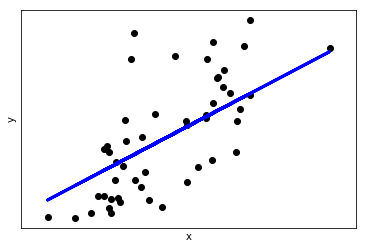

In [118]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('x')
plt.ylabel('y')

plt.show()